# TensorFlow and Keras Basic Syntax

With TensorFlow 2.0 , Keras is now the main API choice.

# The Data

We will use a very simple fake data set.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.


# Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


# Explore the data

We should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

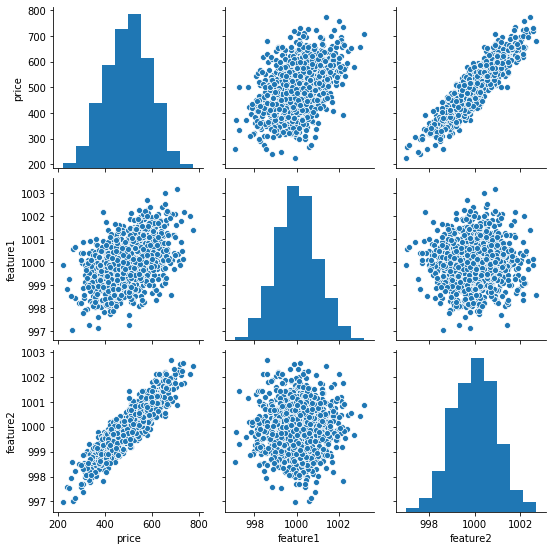

In [5]:
sns.pairplot(df)

# Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

# Normalizing/Scaling the Data

We scale the feature data.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow.


In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

# Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

# Training

In [25]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 4ms/step - loss: 256662.5781
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256542.1719
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256421.1406
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256288.5938
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256143.3594
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255986.1250
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255816.7031
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255630.4844
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255425.2344
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255199.2188
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254949.7812
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 21508.7598
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 18222.7305
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 15197.9805
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 12478.1973
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 10001.8154
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 7806.5166
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 5954.7998
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 4451.9033
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 3307.9646
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 2523.7576
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 2060.2588
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 18

22/22 [==============================] - 0s 2ms/step - loss: 232.3800
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 220.6746
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 211.3719
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 202.3939
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 192.3163
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 183.1939
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 174.0855
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 165.1094
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 156.2484
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 147.5416
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 139.8505
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 132.3573
Epoch 

# Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [26]:
model.history.history

{'loss': [256662.578125,
  256542.171875,
  256421.140625,
  256288.59375,
  256143.359375,
  255986.125,
  255816.703125,
  255630.484375,
  255425.234375,
  255199.21875,
  254949.78125,
  254675.75,
  254376.546875,
  254050.3125,
  253694.03125,
  253306.28125,
  252885.734375,
  252432.484375,
  251942.171875,
  251416.734375,
  250849.25,
  250238.78125,
  249588.15625,
  248891.90625,
  248148.296875,
  247352.28125,
  246505.640625,
  245610.671875,
  244657.375,
  243648.921875,
  242581.6875,
  241454.515625,
  240253.8125,
  238999.71875,
  237683.109375,
  236286.171875,
  234816.484375,
  233287.546875,
  231678.421875,
  229992.984375,
  228232.25,
  226389.765625,
  224464.984375,
  222449.09375,
  220360.015625,
  218186.484375,
  215920.1875,
  213557.625,
  211112.53125,
  208576.703125,
  205948.28125,
  203238.453125,
  200433.6875,
  197520.9375,
  194519.203125,
  191422.375,
  188219.875,
  184932.984375,
  181542.671875,
  178061.5,
  174485.640625,
  170814.406

In [27]:
loss = model.history.history['loss']

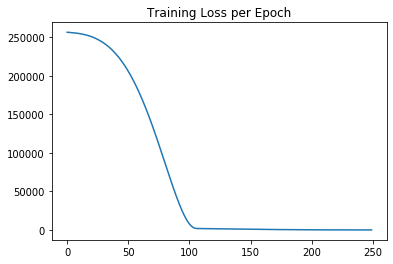

In [28]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

In [29]:
model.metrics_names

['loss']

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

24.30674934387207

In [32]:
test_score

25.302831649780273

### Further Evaluations

In [33]:
test_predictions = model.predict(X_test)

In [34]:
test_predictions

array([[405.74023],
       [622.7926 ],
       [591.4311 ],
       [572.04846],
       [367.82983],
       [578.7579 ],
       [515.4361 ],
       [459.04688],
       [549.1837 ],
       [447.47906],
       [611.0897 ],
       [548.06274],
       [419.51648],
       [409.4293 ],
       [649.7694 ],
       [437.41937],
       [507.88147],
       [659.45557],
       [661.8243 ],
       [564.8898 ],
       [335.35095],
       [445.10156],
       [383.3105 ],
       [379.32666],
       [566.19946],
       [610.2049 ],
       [532.22595],
       [428.1353 ],
       [654.8483 ],
       [414.26834],
       [442.67007],
       [485.1386 ],
       [438.6422 ],
       [681.0315 ],
       [424.74258],
       [418.3017 ],
       [501.25995],
       [550.08435],
       [510.03543],
       [396.3853 ],
       [617.75073],
       [416.85638],
       [603.70685],
       [445.79797],
       [501.91977],
       [580.59985],
       [667.5629 ],
       [490.17236],
       [319.25598],
       [485.49103],


In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [37]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [38]:
test_predictions

0      405.740234
1      622.792603
2      591.431091
3      572.048462
4      367.829834
          ...    
295    529.062134
296    516.076965
297    608.918457
298    417.082764
299    411.506470
Length: 300, dtype: float32

In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df.columns = ['Test Y','Model Predictions']

In [41]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.740234
1,624.156198,622.792603
2,582.455066,591.431091
3,578.588606,572.048462
4,371.224104,367.829834
...,...,...
295,525.704657,529.062134
296,502.909473,516.076965
297,612.727910,608.918457
298,417.569725,417.082764


Let's compare to the real test labels!

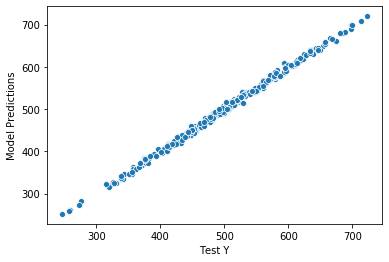

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

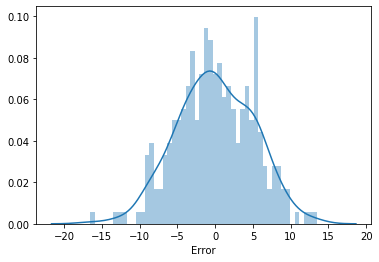

In [44]:
sns.distplot(pred_df['Error'],bins=50)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.05959797537045

In [47]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.30283628872526

In [48]:
# Essentially the same thing, difference just due to precision
test_score

25.302831649780273

In [49]:
#RMSE
test_score**0.5

5.030192009235858

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [50]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [51]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem)

array([[420.56982]], dtype=float32)

# Saving and Loading a Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
later_model = load_model('my_model.h5')

In [57]:
later_model.predict(new_gem)

array([[420.56982]], dtype=float32)